# Imports & Configs

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
else:
    print(os.listdir(os.getcwd()))


/kaggle/input/d/aeryss/clickstream-data-for-online-shopping/e-shop clothing 2008.csv
/kaggle/input/d/aeryss/clickstream-data-for-online-shopping/e-shop clothing 2008 data description.txt
/kaggle/input/eshop-clothing-dataset/e-shop clothing 2008.csv
/kaggle/input/clickstream-data-for-online-shopping/e-shop clothing 2008.csv
['__notebook__.ipynb']


In [2]:
df = pd.read_csv("/kaggle/input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


# Data preparation for EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [4]:
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}


In [5]:
df['country'] = df['country'].astype("string")
df["country"] = df["country"].map(country_map)

In [6]:
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
df["page 1 (main category)"] = df["page 1 (main category)"].map(page1_map)


In [7]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

df["location"] = df["location"].map(location_map)


In [8]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

df["colour"] = df["colour"].map(color_map)


In [9]:
model_map = {
    1: "En face",
    2: "Profile"}

df["model photography"] = df["model photography"].map(model_map)


In [10]:
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

df["month"] = df["month"].map(month_map)


# EDA

## Which country has the most  website visitors?

In [11]:
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show()


It seems that Poland and Czech Republic are the countries that have most visitors

## Flexibility in buying products for each country 

In [12]:
df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")


In [13]:
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show()


**Countries like Romani and Estonia have high flexibility (It`s Great) and countries like Greece and Croatia have low flexibility. I think there are things that affect it like**:
- Different language that they use 
- stranger products that they searched 
- They was browsing only (viewing products)
- Hardly getting their products (We will discuss this problem later)

## Relationship between month and buying from the website

In [14]:
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()


As we can see April and May is the most selling months and June is the lowest selling month 

The data for August is incomplete. it stops at day 13 only

In [15]:
df[df['month'] == 'August']['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

## Does users seek cheaper products ?

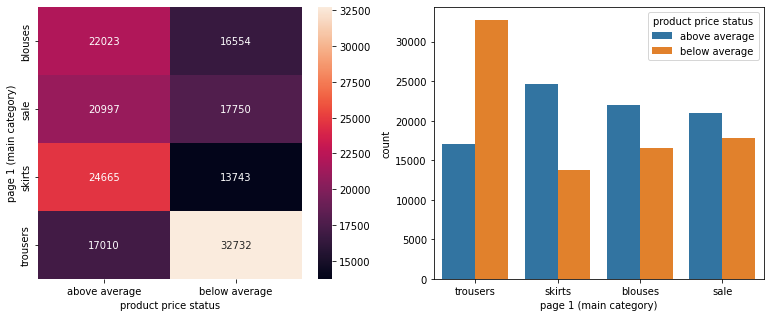

In [16]:
df_copy = df.copy()
df_copy['product price status'] = df_copy['price 2'].map({
    1: 'above average',
    2: 'below average'
}).astype('category')

plt.figure(figsize= (13, 5))
#LEFT plot: Heatmap
plt.subplot(1, 2, 1)
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_copy.groupby(['page 1 (main category)', 'product price status']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have page 1 (main category) names class on rows
ct_counts = ct_counts.pivot(index = 'page 1 (main category)', columns = 'product price status', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')
# RIGHT plot: Clustered box plot
plt.subplot(1, 2, 2)
sns.countplot(data = df_copy, x = 'page 1 (main category)', hue = 'product price status')
plt.show()

## Are more clicks on the website refer to higher sales? and is the main category related?


In [17]:
df11 = df.groupby(by=["order",'page 1 (main category)'])[["price"]].sum().reset_index()
fig = px.scatter(df11, x="order", y="price",color=df11['page 1 (main category)'])
fig.show()

The answer for our question is NO because clicks higher than 100 are not highly selling.Generally trousers are most selling for most orders and then blouses

## What is the best selling category?

In [18]:
df_1 = df.groupby("page 1 (main category)")[["price"]].count()
df_2 = df.groupby("page 1 (main category)")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]], 
                    subplot_titles = [
                        'Total sales per Type',
                        'Total sales in dollars per Type'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()


It seems that trousers are prefered buying but our categories is fairly distributed 

## What does customers buy from each page?

In [19]:
df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="page 1 (main category)", barmode="group")

- The first page is the best for selling specially for trousers and skirts categories 
- It seems also that last page is preferred for sale products

we can also conclude that:
- In page 1, The trousers are better than the other products
- In page 2, The skirts are better than the other products
- In page 3, The blouses are better than the other products
- Finnaly in page 4 and 5, users taget the sales


## What is the most attractable section in page and color of product per type?

In [20]:
df2 = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(df2, x="location", y="counts",
                 color='colour', size='counts', size_max=30)
fig.show()


We can see:
- The Bottom left and the top left are the most attractible sections on the website
- Users prefer products with blue color in the top section
- Users prefer products with black color in the bottom left and bottom right sections
- Users prefer products that has many colors in the bottom-middle section

## Are selling products affected by colour ?

In [21]:
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)

In [22]:
fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices")
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show()

It seems that selling products is affected by color and we can conclude that:
- **blue** and **black** colors are preferred for customers

## Relationship between countries and buying days

In [23]:
df_sum = df.groupby(by=["country", 'day'])[['price']].sum().reset_index() 
df_sum = df_sum.sort_values(['price'], ascending=False)

count = df.groupby(by=["country", 'day'])[['price']].count().reset_index() 
count = count.sort_values(['price'], ascending=False)

df_sum['avreage_prices'] = df_sum['price']/count['price']
df_sum = df_sum.sort_values(['avreage_prices'], ascending=False)

fig = px.scatter(df_sum, x=df_sum["country"], y=df_sum["day"],color=df_sum['avreage_prices'],size=df_sum['avreage_prices'])
fig.show()

For **Poland**, selling products is **very high** in First of the month and then **decreases** by the last day of the month   

For **Czech Republic**, selling products **goes up and down** within the days of the month 


## Should we put model photography in the face of the product or in the inside the profile ?

In [24]:
df5 = df.groupby(by=["model photography", 'page 1 (main category)'])[
    'price'].count().reset_index(name="counts")
px.bar(data_frame=df5, x="model photography", y="counts",
       color="page 1 (main category)", barmode="group")


**YES** we should put model photography en face of the products

## Relation between sales and buying days per month

In [25]:
df9 = df[df['page 1 (main category)']== "sale"]
df9 = df.groupby(by=["month","day"])['page 1 (main category)'].count().reset_index(name="counts")


fig = px.scatter(df9, y='month', x="day",
                 size="counts")
fig.show()

# Data Preprocessing

## Missing Data

In [26]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

Great, No missing values

## Duplicates 

In [27]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


No duplicate rows

## Remove useless columns

In [28]:
df.drop('session ID', axis=1, inplace=True)

## Data Distribution

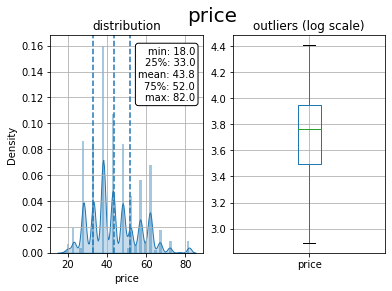

In [29]:
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
sns.distplot(df_copy[x], hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df_copy[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df_copy[x])
tmp_dtf[x] = np.log(df_copy[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

## Outliers

In [30]:
# for col in df:
#     if col != 'price' and is_numeric_dtype(df[col]):
#         print('-'*30)
#         fig, ax = plt.subplots(2, 1, figsize=(12, 4))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['price'], ax=ax[1])
#         plt.show()

After inspecting the outliers, It seems to be important data 

## Label Encoding 

In [31]:
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder

In [32]:
df["price 2"] = df["price 2"] - 1

## Correlation Matrix

Text(0.5, 1.0, 'pearson correlation')

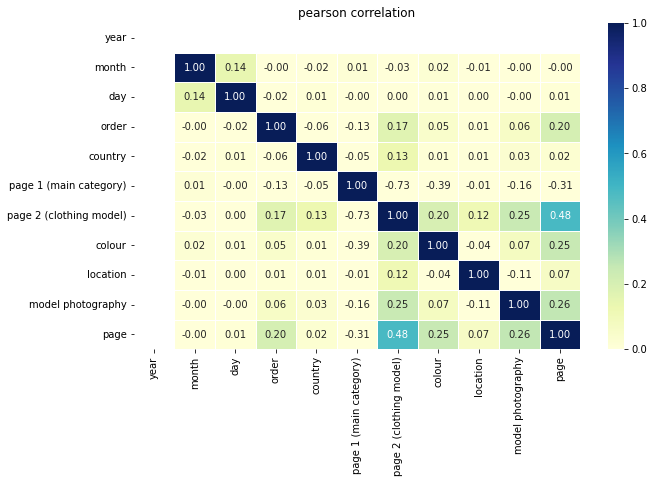

In [33]:
df_copy2 = df.drop(['price','price 2'], axis=1)
plt.figure(figsize=(10,6))
corr_matrix = df_copy2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

# Model Training - Classification on 'price 2' 

## Splitting & Feature Scaling  

In [34]:
X = df.drop('price 2', axis=1)
y = df["price 2"]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state = 0)

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

In [36]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [37]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9896053665316976
Test Score: 0.9891297779120714


## K Nearest Neighbors (KNN) classification model

In [38]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9962228802804134
Test Score: 0.9927103792113612


## Random Forest Classifier

In [39]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 12)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [40]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=0, values=[1.0], datetime_start=datetime.datetime(2022, 10, 6, 12, 41, 7, 957166), datetime_complete=datetime.datetime(2022, 10, 6, 12, 41, 10, 831016), params={'rf_max_depth': 27, 'rf_max_features': 4}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=12, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [41]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 1.0
Test Score: 1.0


## XGBoost Gradient Boosting Model

In [42]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
xgb_train, xgb_test = xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 1.0
Test Score: 1.0


## Light Gradient Boosting Model

In [44]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

LGBMClassifier(random_state=42)

In [45]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 1.0


## SKLearn AdaBoost Model

In [46]:
ab_model = AdaBoostClassifier(random_state=42)

In [47]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [48]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 1.0
Test Score: 1.0


## CatBoost Classifier Model

In [49]:
cb_model = CatBoostClassifier(verbose=0)

In [50]:
cb_model.fit(x_train, y_train)

In [51]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

Training Score: 1.0
Test Score: 1.0


## SVM Model

In [52]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [53]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=25, values=[0.9995392053180239], datetime_start=datetime.datetime(2022, 10, 6, 12, 59, 13, 903831), datetime_complete=datetime.datetime(2022, 10, 6, 12, 59, 25, 507397), params={'kernel': 'poly', 'c': 1.0, 'degree': 3}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02), 'degree': IntDistribution(high=10, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=25, state=TrialState.COMPLETE, value=None)


In [54]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif study_svm.best_trial.params['kernel'] == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif study_svm.best_trial.params['kernel'] == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC(kernel='poly')

In [55]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.9997280473801897
Test Score: 0.9995392053180239


# Summary - Classification on 'price 2' 

In [56]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Random Forest", rf_train, rf_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.996223 │     0.99271  │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.989605 │     0.98913  │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ CatBoost            │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ SVM                 │      0.999728 │     0.999539 │
╘═════════

**Conclusion**: for this problem, all models yielded great results

# Model Selection - Regression on 'price'

## Splitting

In [57]:
x = df.drop(columns=['price'])
y = df.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Linear Regression

In [59]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [60]:
lr_train, lr_test = lr_model.score(x_train , y_train), lr_model.score(x_test , y_test)

print(f"Training Score: {lr_train}")
print(f"Test Score: {lr_test}")

Training Score: 0.7736351990480395
Test Score: 0.7764506317157037


## K Nearest Neighbors (KNN) Regressor

In [61]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, step=2)
    classifier_obj = KNeighborsRegressor(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [62]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=30)
print(study_KNN.best_trial)

FrozenTrial(number=9, values=[0.9691819335320631], datetime_start=datetime.datetime(2022, 10, 6, 13, 5, 57, 752438), datetime_complete=datetime.datetime(2022, 10, 6, 13, 6, 3, 274415), params={'KNN_n_neighbors': 6}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=2)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=9, state=TrialState.COMPLETE, value=None)


In [63]:
KNR_model = KNeighborsRegressor(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNR_model.fit(x_train, y_train)

KNR_train, KNR_test = KNR_model.score(x_train, y_train), KNR_model.score(x_test, y_test)

print(f"Train Score: {KNR_train}")
print(f"Test Score: {KNR_test}")

Train Score: 0.9793132844225859
Test Score: 0.9691819335320631


## Random Forest Regressor

In [64]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 12, log=False)
    classifier_obj = RandomForestRegressor(max_features = rf_max_features, max_depth = rf_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [65]:
study_rfr = optuna.create_study(direction='maximize')
study_rfr.optimize(objective, n_trials=30)
print(study_rfr.best_trial)

FrozenTrial(number=12, values=[0.9999989904364716], datetime_start=datetime.datetime(2022, 10, 6, 13, 10, 24, 162188), datetime_complete=datetime.datetime(2022, 10, 6, 13, 10, 39, 868062), params={'rf_max_depth': 18, 'rf_max_features': 12}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=12, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE, value=None)


In [66]:
rfr = RandomForestRegressor(max_features = study_rfr.best_trial.params['rf_max_features'], max_depth = study_rfr.best_trial.params['rf_max_depth'])

rfr.fit(x_train, y_train)
rfr_train, rfr_test = rfr.score(x_train, y_train), rfr.score(x_test, y_test)

print(f"Train Score: {rfr_train}")
print(f"Test Score: {rfr_test}")

Train Score: 0.9999996598833932
Test Score: 0.9999989904364716


## XGBoost Gradient Boosting Regressor

In [67]:
xgbr_model = XGBRegressor()
xgbr_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
xgbr_train, xgbr_test = xgbr_model.score(x_train , y_train), xgbr_model.score(x_test , y_test)

print(f"Training Score: {xgbr_train}")
print(f"Test Score: {xgbr_test}")

Training Score: 0.9999996582890976
Test Score: 0.9999996657009846


## Light Gradient Boosting Model

In [69]:
lgbr_model = LGBMRegressor()
lgbr_model.fit(x_train, y_train)

LGBMRegressor()

In [70]:
lgbr_train, lgbr_test = lgbr_model.score(x_train , y_train), lgbr_model.score(x_test , y_test)

print(f"Training Score: {lgbr_train}")
print(f"Test Score: {lgbr_test}")

Training Score: 0.9997065682071354
Test Score: 0.9997175790970568


## SKLearn AdaBoost Model

In [71]:
abr_model = AdaBoostRegressor()
abr_model.fit(x_train, y_train)

AdaBoostRegressor()

In [72]:
abr_train, abr_test = abr_model.score(x_train , y_train), abr_model.score(x_test , y_test)

print(f"Training Score: {abr_train}")
print(f"Test Score: {abr_test}")

Training Score: 0.8852492219082346
Test Score: 0.8854136433039486


## CatBoost Classifier Model

In [73]:
cbr_model = CatBoostRegressor(verbose=0)
cbr_model.fit(x_train, y_train)

In [74]:
cbr_train, cbr_test = cbr_model.score(x_train , y_train), cbr_model.score(x_test , y_test)

print(f"Training Score: {cbr_train}")
print(f"Test Score: {cbr_test}")

Training Score: 0.9999982316018718
Test Score: 0.9999979619529021


## SVR Model

In [75]:
SVR_model = SVR(kernel='rbf')

SVR_model.fit(x_train, y_train)

SVR()

In [76]:
SVR_train, SVR_test = SVR_model.score(x_train , y_train), SVR_model.score(x_test , y_test)

print(f"Training Score: {SVR_train}")
print(f"Test Score: {SVR_test}")

Training Score: 0.9326950603482219
Test Score: 0.9306723872249485


# Summary - Regression on 'price 2' 

In [77]:
data = [["KNN Regressor", KNR_train, KNR_test], 
        ["Logistic Regression", lr_train, lr_test],
        ["Random Forest Regressor", rfr_train, rfr_test], 
        ["XGBM", xgbr_train, xgbr_test], 
        ["Adaboost", abr_train, abr_test], 
        ["light GBM", lgbr_train, lgbr_test],
        ["CatBoost", cbr_train, cbr_test], 
        ["SVM", SVR_train, SVR_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════╤═══════════════╤══════════════╕
│ Model                   │   Train Score │   Test Score │
╞═════════════════════════╪═══════════════╪══════════════╡
│ KNN Regressor           │      0.979313 │     0.969182 │
├─────────────────────────┼───────────────┼──────────────┤
│ Logistic Regression     │      0.773635 │     0.776451 │
├─────────────────────────┼───────────────┼──────────────┤
│ Random Forest Regressor │      1        │     0.999999 │
├─────────────────────────┼───────────────┼──────────────┤
│ XGBM                    │      1        │     1        │
├─────────────────────────┼───────────────┼──────────────┤
│ Adaboost                │      0.885249 │     0.885414 │
├─────────────────────────┼───────────────┼──────────────┤
│ light GBM               │      0.999707 │     0.999718 │
├─────────────────────────┼───────────────┼──────────────┤
│ CatBoost                │      0.999998 │     0.999998 │
├─────────────────────────┼───────────────┼─────────────